# Analyze Genome Taxonomy Database r214

This notebook analyzes predicted conditions for all representative species in the Genome Taxonomy Database

In [101]:
import pandas as pd
from glob import glob
from collections import Counter

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../")
from genomic_spot.helpers import rename_condition_to_variable
plt.rcParams['svg.fonttype'] = 'none'

plt.style.use('project.mplstyle')

In [2]:
plot_formats = {
    'oxygen' : 'Oxygen Tolerance',
    'temperature' : 'Temperature',
    'ph' : 'pH',
    'salinity' : 'Salinity',
    'temperature_optimum' : 'Temperature, Optimum ',
    'ph_optimum' : 'pH, Optimum',
    'salinity_optimum' : 'Salinity, Optimum',
}


In [93]:
targets = ['oxygen', 'temperature_optimum', 'salinity_optimum', 'ph_optimum']

bin_definitions = {
    'oxygen' : [0, 0.5],
    'ph_optimum' : np.arange(3,12,1),
    'temperature_optimum' : [0,15,30,45,60,80],
    'salinity_optimum' : [0, 0.5, 1, 2.5, 5, 10, 15],
}
oxygen_colors = ['dimgray', 'whitesmoke', 'skyblue']
oxygen_colors = ['#0E95C8',   '#F8A483'] #'whitesmoke',
oxygen_colors = [plt.get_cmap("RdBu_r")(0.15),   plt.get_cmap("RdBu_r")(0.83)] # plt.get_cmap("RdBu_r")(0.5),
oxygen_cmap = LinearSegmentedColormap.from_list('my_cmap', oxygen_colors, N=3)

cmap_definitions = {target : plt.get_cmap("RdBu_r") for target in targets}
cmap_definitions['oxygen'] = oxygen_cmap

In [4]:
# Phylogenetic order, obtained from elsewhere
# You can also just set this to the index if you don't want it to be biologically sorted
phylum_order = ['UBA6262', 'Elusimicrobiota', 'RUG730', 'CG03', 'GCA_021790555', 'CAKKQC01', 'FCPU426', 'JAAXVQ01', 'Firestonebacteria', 'Goldbacteria', 'Aerophobota', 'CAIJMQ01', 'GCA_016783345', 'NPL-UPA2', 'JAHJDO01', 'Ratteibacteria', 'Omnitrophota', 'GCA-001730085', 'GCA_022711655', 'GCA_012729785', 'PUNC01', 'UBA3054', 'JABMQX01', 'UBA6266', 'Auribacterota', 'JAFGBW01', 'JACPWU01', 'JACRDZ01', 'UBA9089', 'UBP18', 'Desantisbacteria', 'Sumerlaeota', 'OLB16', 'Abyssobacteria', 'Hydrogenedentota', 'GCA_002428325', 'Poribacteria', 'RBG-13-66-14', 'Fermentibacterota', 'Fibrobacterota', 'GCA_017997825', 'AABM5-125-24', 'Delongbacteria', 'Calditrichota', 'KSB1', 'JdFR-76', 'QNDG01', 'GCA_016783505', 'SM23-31', 'CLD3', 'Bacteroidota', 'Marinisomatota', 'Cloacimonadota', 'UBP14', 'GCA_016927185', 'WOR-3', 'TA06_A', 'JAAXHH01', 'Latescibacterota', 'GCA_023135015', 'Zixibacteria', 'VGIX01', 'JABDJQ01', 'ARS69', 'GCA_023132135', 'Eisenbacteria', 'Krumholzibacteriota', 'GCA_002686955', 'Gemmatimonadota', '4572-55', 'Edwardsbacteria', 'TA06', 'Acidobacteriota', 'B130-G9', 'CSSED10-310', 'Campylobacterota', 'Aquificota', 'Thermosulfidibacterota', 'Chrysiogenota', 'Deferribacterota', 'Desulfobacterota_D', 'GCA_024275095', 'Calescibacterota', 'GCA_020722945', 'Desulfobacterota_G', 'JAMCPX01', 'SZUA-79', 'GCA_003695505', 'Pseudomonadota', 'UBA2233', 'Nitrospirota_A', 'Desulfobacterota_E', 'BMS3Abin14', 'Desulfobacterota_C', 'Desulfobacterota_F', 'SZUA-182', 'Moduliflexota', 'Methylomirabilota', 'Schekmanbacteria', 'UBA8248', 'GCA_016192455', 'GCA_022562795', 'GCA_016193065', 'Tectomicrobia', 'Nitrospinota_B', 'Nitrospinota', 'CG2-30-53-67', 'GCA_016212085', 'CG2-30-70-394', 'Nitrospirota', 'Desulfobacterota', 'UBA10199', 'GCA_016202395', 'JACPQY01', 'RBG-13-61-14', 'GCA_003598065', 'FEN-1099', 'Myxococcota', 'GCA_020434085', 'GCA_016713535', 'Myxococcota_A', 'Desulfobacterota_B', 'UBP6', 'SAR324', 'Bdellovibrionota', 'Planctomycetota', 'Chlamydiota', 'Verrucomicrobiota', 'UBA8481', 'Lindowbacteria', 'T1Sed10-126', 'Dependentiae', 'GCA_017999075', 'GCA_003554345', 'AUK180', 'Spirochaetota', 'Bipolaricaulota', 'Deinococcota', 'Patescibacteria', '4484-113', 'UBP15', 'UBP7', 'Riflebacteria', 'UBP17', 'Muirbacteria', 'Wallbacteria', 'Mcinerneyibacteriota', 'Fusobacteriota', 'Synergistota', 'Atribacterota', 'Thermotogota', 'DUMJ01', 'Dictyoglomota', 'JACIXR01', 'DRYD01', 'Thermodesulfobiota', 'HKB111', 'Coprothermobacterota', 'JANLFM01', 'Caldisericota', 'Cyanobacteriota', 'Margulisbacteria', 'Actinomycetota', 'CSP1-3', 'Dormibacterota', 'Chloroflexota', 'GCA_002410925', 'Armatimonadota', 'Eremiobacterota', 'Bacillota_E', 'Bacillota_G', 'Bacillota_F', 'GCA_012840065', 'Bacillota_A', 'Bacillota_C', 'Bacillota_B', 'Bacillota_D', 'Bacillota', 'Bacillota_H', 'GCA_007132905', 'DTU030', 'GCA_002789275', 'Aenigmatarchaeota', 'Nanohaloarchaeota', 'EX4484-52', 'Nanoarchaeota', 'SpSt-1190', 'GCA_013154095', 'Undinarchaeota', 'Micrarchaeota', 'B1Sed10-29', 'Iainarchaeota', 'Altiarchaeota', 'Thermoproteota', 'Asgardarchaeota', 'Thermoplasmatota', 'Halobacteriota', 'Methanobacteriota_B', 'Hadarchaeota', 'Methanobacteriota', 'Hydrothermarchaeota', 'GCA_024860865']
print(phylum_order)

['UBA6262', 'Elusimicrobiota', 'RUG730', 'CG03', 'GCA_021790555', 'CAKKQC01', 'FCPU426', 'JAAXVQ01', 'Firestonebacteria', 'Goldbacteria', 'Aerophobota', 'CAIJMQ01', 'GCA_016783345', 'NPL-UPA2', 'JAHJDO01', 'Ratteibacteria', 'Omnitrophota', 'GCA-001730085', 'GCA_022711655', 'GCA_012729785', 'PUNC01', 'UBA3054', 'JABMQX01', 'UBA6266', 'Auribacterota', 'JAFGBW01', 'JACPWU01', 'JACRDZ01', 'UBA9089', 'UBP18', 'Desantisbacteria', 'Sumerlaeota', 'OLB16', 'Abyssobacteria', 'Hydrogenedentota', 'GCA_002428325', 'Poribacteria', 'RBG-13-66-14', 'Fermentibacterota', 'Fibrobacterota', 'GCA_017997825', 'AABM5-125-24', 'Delongbacteria', 'Calditrichota', 'KSB1', 'JdFR-76', 'QNDG01', 'GCA_016783505', 'SM23-31', 'CLD3', 'Bacteroidota', 'Marinisomatota', 'Cloacimonadota', 'UBP14', 'GCA_016927185', 'WOR-3', 'TA06_A', 'JAAXHH01', 'Latescibacterota', 'GCA_023135015', 'Zixibacteria', 'VGIX01', 'JABDJQ01', 'ARS69', 'GCA_023132135', 'Eisenbacteria', 'Krumholzibacteriota', 'GCA_002686955', 'Gemmatimonadota', '45

# Load data


## GTDB

In [5]:

DIR_DATA = '/Users/tylerbarnum/cultivarium/tyler-analysis/data/'
GTDB_TAXONOMY_TABLES = [f'{DIR_DATA}/strain-selection/ar53_metadata_r214.tsv', 
                        f'{DIR_DATA}/strain-selection/bac120_metadata_r214.tsv']
RANKS = ['domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']
def strains_to_species(strains : list):
    species = []
    for strain in strains:
        split = strain.split()
        if len(split) == 0:
            species.append('')
        elif len(split) == 1:
            species.append(split[0])
        elif split[1] == 'sp.':
            species.append(' '.join(split[0:3]))
        else:
            species.append(' '.join(split[0:2]))
    return species
    
def gtdb_accession_to_ncbi(accession : str, 
                           make_genbank : bool = True, 
                           remove_version : bool = True) -> str:
    """Convert GTDB 'accession' into NCBI accession.

    Options allow different formats.

    Args:
        accession: GTDB accession e.g. RS_GCF_016456235.1
        make_genbank: Replace the initial 'GCF_' with 'GCA_'
        remove_version: Remove the terminal '.#'
    Returns:
        ncbi_accession : NCBI accession e.g. GCA_016456235
    """

    ncbi_accession = accession[3:]
    if make_genbank:
        ncbi_accession = ncbi_accession.replace('GCF_', 'GCA_')
    if remove_version:
        ncbi_accession = ncbi_accession[:-2]
    return ncbi_accession


def load_gtdb_df(genomic_metadata_paths : list,
                 simple=True):

    
    df_gtdb = pd.concat([pd.read_csv(tsv, sep='\t', header=0) for tsv in genomic_metadata_paths], axis=0) 

    if simple == True:
        retain_columns = {'accession' : str, 'ncbi_taxid' : int, 'ncbi_genbank_assembly_accession' : str,
                      'ncbi_taxonomy' : str,  'gtdb_taxonomy' : str,  'gtdb_genome_representative' : str, 
                     }
        df_gtdb = df_gtdb.loc[:, retain_columns.keys()]
        
    
    df_taxonomy = df_gtdb['gtdb_taxonomy'].str.split(';', expand=True)
    df_taxonomy.columns = RANKS
    df_gtdb = pd.concat([df_gtdb, df_taxonomy], axis=1)

    strains = [taxonomy.split(';')[-1][3:] for taxonomy in df_gtdb['ncbi_taxonomy']]
    df_gtdb['ncbi_species'] =  strains_to_species(strains)
    df_gtdb['ncbi_accession'] = df_gtdb['accession'].apply(lambda x : gtdb_accession_to_ncbi(x)) 
    df_gtdb['representative_ncbi_accession'] = df_gtdb['gtdb_genome_representative'].apply(lambda x : gtdb_accession_to_ncbi(x)) 
    df_gtdb = df_gtdb.set_index('accession')
    #df_gtdb['ncbi_genus'] = df_gtdb['genus'].str[3:]
    return df_gtdb

gtdb_df = load_gtdb_df(genomic_metadata_paths=GTDB_TAXONOMY_TABLES, simple=False)
gtdb_df.head(1)

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,domain,phylum,class,order,family,genus,species,ncbi_species,ncbi_accession,representative_ncbi_accession
accession,,,,,,,,,,,,,,,,,,,,,
GB_GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.29948,1,...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans,Nanoarchaeum equitans,GCA_000008085,GCA_000008085


In [6]:
gtdb_df['ncbi_genome_category'].value_counts()

ncbi_genome_category
none                                 276424
derived from metagenome              118167
derived from environmental sample      7222
derived from single cell                896
Name: count, dtype: int64

## Features or Predictions

In [7]:
# json.loads(open('data/features/GCA_0043637251.features.json').read()).keys()
# filename = 'data/features/GCA_0043637251.features.json'

def load_genome(filename):
    flatten_by_localization = False
    # FIX: misnamed genome
    #genome = filename.split('/')[-1].split('.')[0][:-1]
    genome = filename.split('/')[-1].split('.')[0].replace('GCF_', 'GCA_')

    sers = []
    json_df = pd.read_json(filename)
    for col in json_df.columns:
        ser = json_df.loc[:, col]
        ser.name = genome
        index_tuples = list(zip([col] * len(ser), ser.index.tolist()))
        index = pd.MultiIndex.from_tuples(index_tuples, names=["localization", "variable"])
        ser.index = index
        sers.append(ser)
        
    df_genome = pd.concat(sers, axis=0)
    return df_genome

def load_features_to_dataframe(features_dir):
    sers = []
    for filename in glob(features_dir + '*.features.json'):
        ser_genome = load_genome(filename)
        sers.append(ser_genome)
    df_features = pd.concat(sers, axis=1).T

    # Missing data should be 0
    df_features = df_features.fillna(0.)

    renamed_cols = ['_'.join(ser) for ser in df_features]
    df_features.columns = df_features.columns.droplevel()
    df_features.columns = renamed_cols

    return df_features
    
FEATURES_DIRECTORY = '/Users/tylerbarnum/cultivarium/external/gtdb/r214/features-v4/'
df_features = load_features_to_dataframe(features_dir = FEATURES_DIRECTORY) 
df_features

,all_nt_length,all_pur_pyr_transition_freq,all_nt_C,all_nt_A,all_total_proteins,all_total_protein_length,all_pis_acidic,all_pis_neutral,all_pis_basic,all_pis_3_4,...,diff_extra_intra_aa_CE,diff_extra_intra_aa_CH,diff_extra_intra_aa_CC,diff_extra_intra_aa_CM,diff_extra_intra_aa_WF,diff_extra_intra_aa_CW,diff_extra_intra_aa_CR,diff_extra_intra_aa_WM,diff_extra_intra_aa_WC,diff_extra_intra_protein_coding_density
GCA_945865315,3268622.0,0.469597,0.330090,0.669910,2558.0,929727.0,0.183346,0.386630,0.430023,0.0,...,0.000399,0.000000,6.298325e-04,0.000025,-0.000096,0.000000,-0.000712,-0.000192,-5.006350e-05,0.0
GCA_019668465,5831457.0,0.537898,0.670763,0.329237,5391.0,1757505.0,0.479132,0.315711,0.205157,0.0,...,0.000058,0.000116,-2.483916e-05,-0.000010,0.000077,-0.000071,-0.000171,-0.000053,6.957338e-05,0.0
GCA_022013695,2613105.0,0.442826,0.396957,0.603043,2423.0,780823.0,0.267850,0.375567,0.356583,0.0,...,-0.000515,-0.000198,-1.586728e-04,0.000000,-0.000038,-0.000020,-0.000294,-0.000090,-9.479255e-07,0.0
GCA_025059875,1974558.0,0.485886,0.595108,0.404892,1707.0,620846.0,0.144112,0.484476,0.371412,0.0,...,-0.000318,-0.000261,0.000000e+00,0.000000,-0.000065,-0.000111,-0.000804,0.000154,1.114702e-04,0.0
GCA_019419625,2072323.0,0.525415,0.600922,0.399078,1819.0,600860.0,0.611875,0.252336,0.135789,0.0,...,-0.000947,-0.000258,-2.355708e-04,-0.000256,-0.000024,-0.000103,-0.000729,-0.000072,-9.679650e-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_021841985,3257789.0,0.524262,0.673289,0.326711,3258.0,988182.0,0.169429,0.477594,0.352977,0.0,...,-0.000326,-0.000082,-2.248155e-07,-0.000032,0.000204,-0.000036,-0.000166,0.000075,-2.156741e-06,0.0
GCA_016124805,3211684.0,0.513014,0.588922,0.411078,3058.0,966221.0,0.365271,0.419882,0.214846,0.0,...,-0.000115,0.000007,-7.163805e-05,0.000012,-0.000136,-0.000016,-0.000091,-0.000027,-8.972135e-06,0.0
GCA_019241735,2619215.0,0.493309,0.560916,0.439084,2730.0,784389.0,0.173260,0.452381,0.374359,0.0,...,-0.000532,-0.000308,-4.706602e-05,-0.000112,-0.000203,-0.000055,-0.000336,-0.000008,-8.431379e-05,0.0
GCA_000518885,5558881.0,0.450615,0.406261,0.593739,5525.0,1503079.0,0.364706,0.358190,0.277104,0.0,...,-0.000675,-0.000204,0.000000e+00,-0.000166,-0.000014,-0.000086,-0.000383,-0.000014,-1.221333e-05,0.0


In [8]:
# df_features[[col for col in df_features.columns if col.startswith('all') and len(col.split('aa_')[-1]) != 2]].to_csv('gtdb_features_subset_20231203.tsv' , sep='\t')

In [9]:
# Optima

def load_predictions_to_dfs(tsv):
    predictions_df = pd.read_csv(tsv, sep='\t', index_col=0)
    indices = predictions_df.index.tolist()
    predictions_df['condition'] = [index.split('_')[0] for index in indices]
    predictions_df['prediction'] = ['_'.join(index.split('_')[1:]) for index in indices]
    
    optimum_df = predictions_df[(predictions_df['prediction'].str.contains('optimum')) | (predictions_df['condition'] == 'oxygen')]
    optimum_df = optimum_df.set_index(['condition', 'prediction'])
    optimum_df = optimum_df.loc[[('oxygen', ''), ('ph', 'optimum_from_range'), ('temperature', 'optimum'), ('salinity', 'optimum_from_range')]].droplevel(level=1)
    optimum_df
    
    range_df = predictions_df.loc[~predictions_df['prediction'].str.contains('optimum')].drop('oxygen')
    range_df = range_df.set_index(['condition', 'prediction']).sort_index()
    range_df
    return range_df, optimum_df



def ravel_dataframe_by_counts(df):
    """Dataframe values are True/False and index is a value"""
    ravel = []
    counts = df.sum(axis=1)
    for x in counts.index:
        count = counts.loc[x]
        ravel.extend([float(x)] * count)
    return ravel

output_files = glob('/Users/tylerbarnum/cultivarium/external/gtdb/r214/predictions-v6/*tsv')
len(output_files), output_files[0:2]

sers = []
for tsv in output_files:
    accession = gtdb_accession_to_ncbi(f"123{tsv.split('/')[-1]}".split('.')[0], remove_version=False)
    try:
        predictions_df = pd.read_csv(tsv, sep='\t', index_col=0)
        #range_df, optimum_df = load_predictions_to_dfs(tsv)
        ser = predictions_df['value']
        ser.name = accession
        sers.append(ser)
    except:
        pass

optima_df = pd.concat(sers,axis=1).T
optima_df

target,oxygen,ph_max,ph_min,ph_optimum,salinity_max,salinity_min,salinity_optimum,temperature_max,temperature_min,temperature_optimum
GCA_902362725,0.000257,9.752999,6.170773,7.958547,6.837148,2.315863,3.829062,44.835617,20.554992,35.592911
GCA_020724205,0.037017,10.713761,6.112701,8.223451,4.958896,0.499968,2.139038,57.881255,32.518854,49.192661
GCA_007095845,0.690685,9.539838,5.734219,7.660717,0.000000,0.000000,0.000000,45.186141,31.306021,39.737130
GCA_019747905,0.845820,9.665726,5.254787,7.343421,5.344700,0.000000,1.277903,44.966879,20.335755,36.057571
GCA_015492245,0.000059,8.548455,5.189155,6.887253,9.418878,2.095418,3.534111,65.718843,41.765593,58.951841
...,...,...,...,...,...,...,...,...,...,...
GCA_016870115,0.905983,9.116734,5.323563,7.130474,4.522315,0.000000,1.055604,43.714075,20.322795,34.199503
GCA_900411375,0.999397,6.288405,3.524675,4.911644,9.387424,0.000000,3.734520,39.448400,14.107614,27.058586
GCA_022361195,0.974806,10.520263,6.709649,8.413321,9.663002,2.897641,4.905471,34.162507,10.057691,25.804460
GCA_007117945,0.986797,10.887031,6.939463,8.942591,14.860539,3.339291,7.315084,41.434009,14.899239,32.782690


In [10]:
predictions_df.reset_index().columns

Index(['target', 'value', 'error', 'units', 'is_novel', 'warning'], dtype='object')

In [11]:
df = pd.merge(optima_df, gtdb_df.set_index('ncbi_accession'), left_index=True, right_index=True, how='left')
df.shape

(84843, 128)

# Validation: Cultivated vs. Uncultivated Organisms in Family

- Finds families with both cultivated and uncultivated genomes
- Compares average predictions between those groups
- Each point in the scatter is a family

In [12]:
rank = 'family'

In [13]:
is_isolate = (df['ncbi_genome_category'] == 'none')
taxa_with_isolate = set(df[is_isolate][rank].drop_duplicates().tolist())
taxa_with_uncultivated = set(df[~is_isolate][rank].drop_duplicates().tolist())
taxa_to_compare = taxa_with_isolate.intersection(taxa_with_uncultivated)

print("# families=", len(taxa_to_compare))

# families= 820


In [14]:
df_compare = df[df[rank].isin(taxa_to_compare)].copy()
df_compare['is_isolate'] = (df_compare['ncbi_genome_category'] == 'none')
df_compare['count'] = 1
df_compare['n_isolate'] = (df_compare['ncbi_genome_category'] == 'none')
df_sum = df_compare.groupby([rank, 'is_isolate'])[targets + ['n_isolate', 'count']].sum().reset_index()
df_compare = df_compare.groupby([rank, 'is_isolate'])[targets + ['n_isolate']].mean().reset_index()


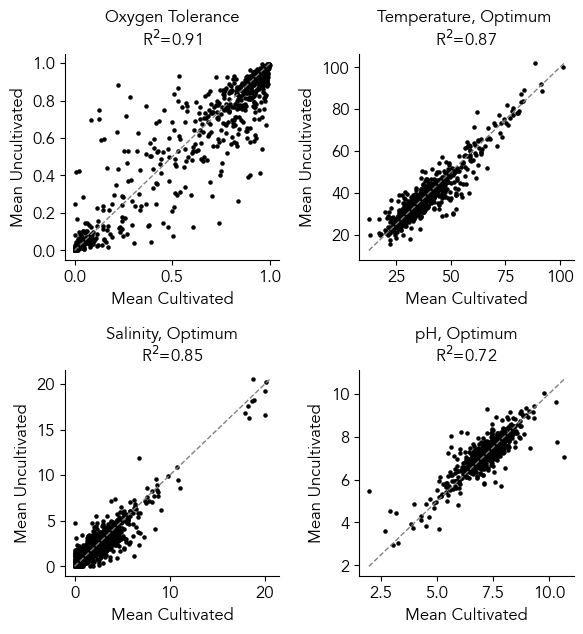

In [102]:
from sklearn.metrics import r2_score
target = 'salinity_optimum'

#fig, axes = plt.subplots(4,1,figsize=(3,13))
fig, axes = plt.subplots(2,2,figsize=(6,6.5))
axl = axes.flatten()

for n, target in enumerate(targets):
    ax = axl[n]
    df_plot = pd.pivot(df_compare, index='family', columns='is_isolate', values=target)
    


    xmin, xmax = df_plot.min().min(), df_plot.max().max()
    X = df_plot[True]
    Y = df_plot[False]

    #r = df_plot.corr(method='pearson').iloc[0,1]    
    r2 = r2_score(X,Y)
    ax.scatter(X, Y, s=5)
    ax.plot([xmin, xmax], [xmin,xmax], linestyle='--', color='gray')
    ax.set_title(plot_formats[target] + f'\nR$^2$={r2:.2f}')
    ax.set_xlabel('Mean Cultivated')
    ax.set_ylabel('Mean Uncultivated')
    
plt.tight_layout()


df_stats = df_sum.groupby('family').mean()
1 - np.mean(df_stats['n_isolate'] / df_stats['count']), 1 - np.min(df_stats['n_isolate'] / df_stats['count']), 1- np.max(df_stats['n_isolate'] / df_stats['count'])
plt.savefig("fig-3A.svg",  format="svg")
plt.show()

In [16]:

df_stats = df_sum.groupby('family').mean()
print("Average uncultivated fraction=", 1 - np.mean(df_stats['n_isolate'] / df_stats['count']))
print("Min uncultivated fraction=", 1 - np.min(df_stats['n_isolate'] / df_stats['count']))
print("Max uncultivated fraction=", 1 - np.max(df_stats['n_isolate'] / df_stats['count']))

Average uncultivated fraction= 0.6196378980974593
Min uncultivated fraction= 0.9974025974025974
Max uncultivated fraction= 0.005876591576885359


# Distribution

oxygen
temperature_optimum
salinity_optimum
ph_optimum


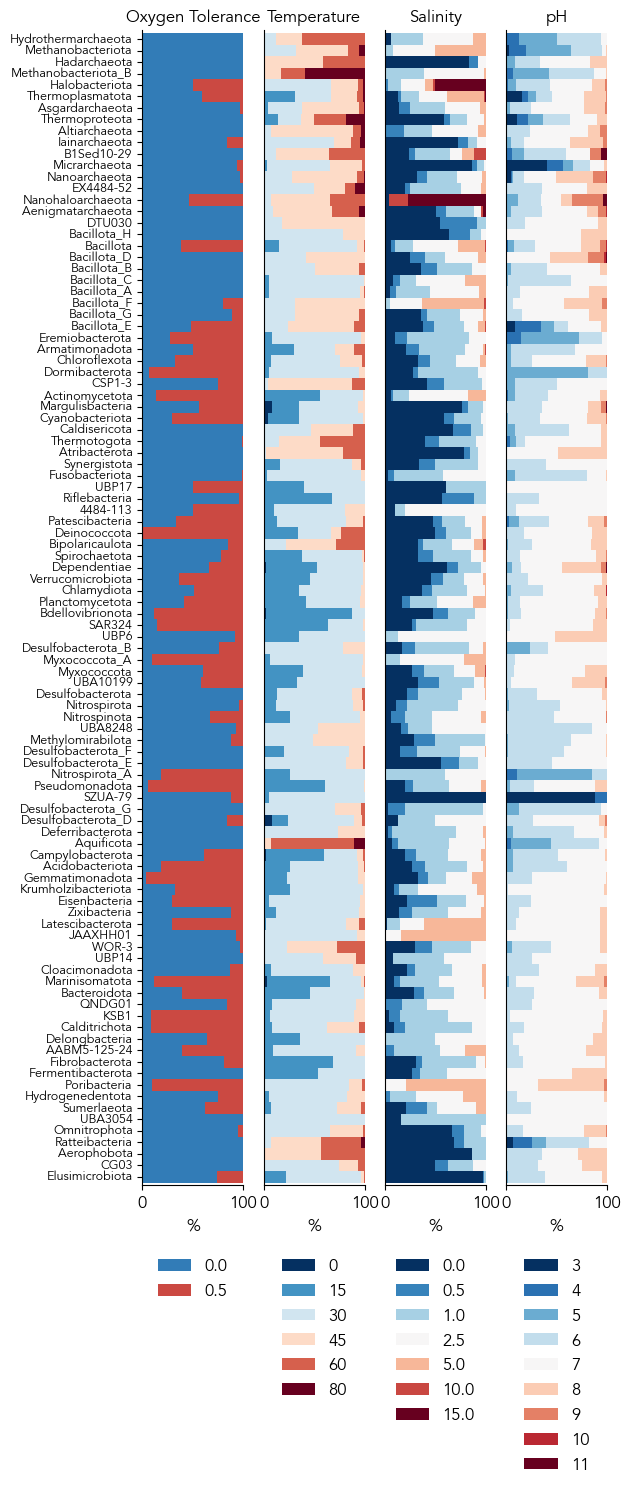

In [103]:
MIN_SPECIES_PER_PHYLUM = 10 

def distribution_df_by_target(target, df=df, taxonomic_level='phylum', normalize=True):
    
    sers = []
    bins = bin_definitions[target]
    for name, group in df.groupby(taxonomic_level):
        genome_ids = group.index.tolist()
        if len(genome_ids) > 0:
            values = df.reindex(genome_ids)[target].dropna()
            values.loc[values < bins[0]] = bins[0]
            binned_values = np.digitize(values, bins) - 1
            binned_ser = pd.Series(Counter(binned_values))
            binned_ser.name = name
            #binned_ser.index = range(len(bins) - 1)
            #binned_ser[0] = binned_ser.map(Counter(binned_values))
            sers.append(binned_ser)
    
    n_bins = len(bins) - 1
    blank_ser = pd.Series(dict(zip(range(n_bins), [0] * n_bins)))
    blank_ser.name = -1
    sers.append(blank_ser)
    
    dist_df = pd.DataFrame(sers).fillna(0).drop(-1)
    if normalize is True:
        dist_df = (dist_df.T / dist_df.sum(axis=1)).T
    dist_df = dist_df.T.sort_index().T
    return dist_df

fig, axes = plt.subplots(1,4, figsize=(6,15))

for n, target in enumerate(targets):
    ax = axes[n]
    dist_df = distribution_df_by_target(target, normalize=False)
    dist_df = dist_df[dist_df.sum(axis=1) >= MIN_SPECIES_PER_PHYLUM]
    dist_df = (dist_df.T / dist_df.sum(axis=1)).T
    dist_df = dist_df.reindex([f"p__{i}" for i in phylum_order if f"p__{i}" in dist_df.index])
    bins = bin_definitions[target]
    print(target)
    if target in ['oxygen',]:
        dist_df.columns = list(bins) #[:-1] 
        if target == 'oxygen':
            cmap = oxygen_cmap
        else:
            cmap = 'RdBu_r'
    else:
        dist_df.columns = list(bins)
        cmap = 'RdBu_r'

    (100 * dist_df).plot.barh(ax=ax, stacked=True, cmap=cmap, edgecolor='None', width=1, legend=True)
    ax.set_title(plot_formats[target.replace('_optimum', '')])
    if n == 0:
        ax.set_yticklabels([s[3:] for s in dist_df.index.tolist()], fontsize=9, rotation=0, ha='right', va='center')
        ax.legend(bbox_to_anchor=(1,0))
    else:
        ax.set_yticklabels([])
        ax.set_yticks([])

    #ax.set_xticks([0,0.5,1.])
    ax.set_xticks([0, 100])
    ax.set_xlim([0, 100])
    ax.set_xlabel('%')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), frameon=False)
plt.savefig("fig-3b.svg",  format="svg")
plt.show()

oxygen
temperature_optimum
salinity_optimum
ph_optimum


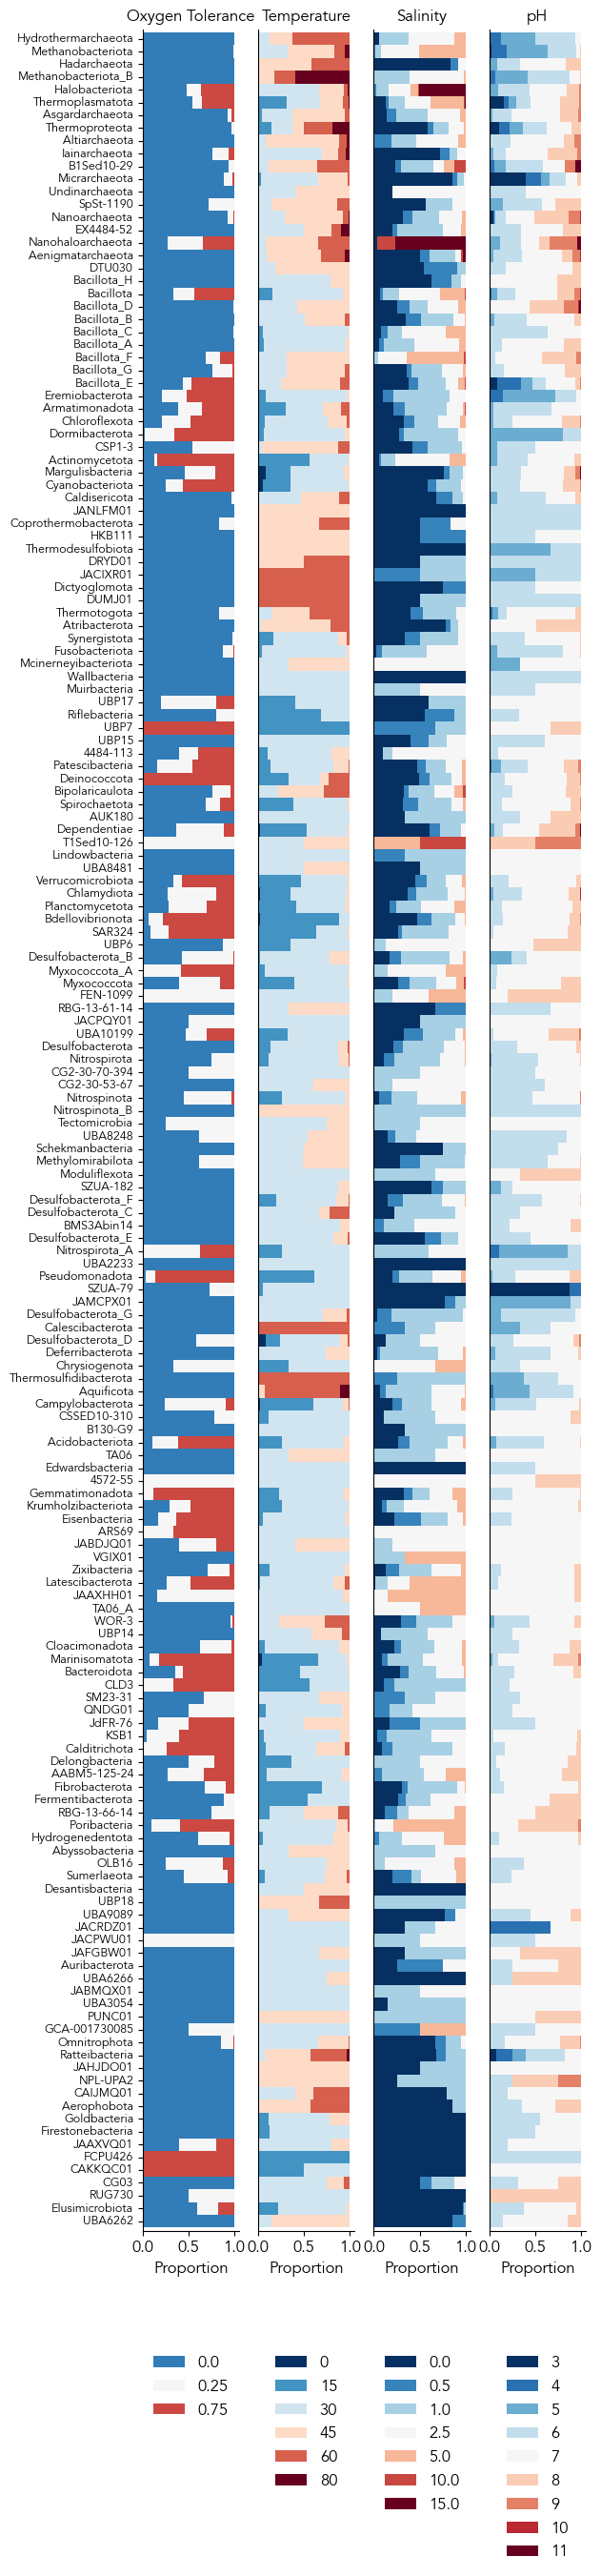

In [17]:
MIN_SPECIES_PER_PHYLUM = 1
fig, axes = plt.subplots(1,4, figsize=(6,30))

for n, target in enumerate(targets):
    ax = axes[n]
    dist_df = distribution_df_by_target(target, normalize=False)
    dist_df = dist_df[dist_df.sum(axis=1) >= MIN_SPECIES_PER_PHYLUM]
    dist_df = (dist_df.T / dist_df.sum(axis=1)).T
    dist_df = dist_df.reindex([f"p__{i}" for i in phylum_order if f"p__{i}" in dist_df.index])
    bins = bin_definitions[target]
    print(target)
    if target in ['oxygen',]:
        dist_df.columns = list(bins) #[:-1] 
        if target == 'oxygen':
            cmap = oxygen_cmap
        else:
            cmap = 'RdBu_r'
    else:
        dist_df.columns = list(bins)
        cmap = 'RdBu_r'

    dist_df.plot.barh(ax=ax, stacked=True, cmap=cmap, edgecolor='None', width=1, legend=True)
    ax.set_title(plot_formats[target.replace('_optimum', '')])
    if n == 0:
        ax.set_yticklabels([s[3:] for s in dist_df.index.tolist()], fontsize=9, rotation=0, ha='right', va='center')
        ax.legend(bbox_to_anchor=(1,0))
    else:
        ax.set_yticklabels([])
        ax.set_yticks([])

    ax.set_xticks([0,0.5,1.])
    ax.set_xlabel('Proportion')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), frameon=False)

    

In [18]:
set(gtdb_df[gtdb_df['phylum'] == 'p__Aquificota']['ncbi_species'].tolist())

{'',
 'Aquifex aeolicus',
 'Balnearium lithotrophicum',
 'Desulfurobacterium atlanticum',
 'Desulfurobacterium indicum',
 'Desulfurobacterium thermolithotrophum',
 'Hydrogenivirga caldilitoris',
 'Hydrogenobacter hydrogenophilus',
 'Hydrogenobacter thermophilus',
 'Hydrogenothermus marinus',
 'Persephonella atlantica',
 'Persephonella hydrogeniphila',
 'Persephonella marina',
 'Phorcysia thermohydrogeniphila',
 'Sulfurihydrogenibium azorense',
 'Sulfurihydrogenibium subterraneum',
 'Sulfurihydrogenibium yellowstonense',
 'Thermocrinis albus',
 'Thermocrinis minervae',
 'Thermocrinis ruber',
 'Thermovibrio ammonificans',
 'Thermovibrio guaymasensis'}

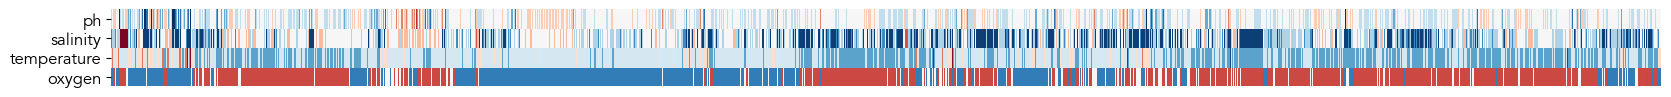

In [19]:
# Alt view  = plot of all species as heatmap
# Issue: some cells obscured / resolution too low
genome_data = df.sort_values(['domain', 'phylum', 'class','order','family','genus','species']) #.reindex(genome_ids)
C = []
for target in targets:
    bins = bin_definitions[target]
    X = genome_data[target].values
    X[X < bins[0]] = bins[0]
    ones = np.array([1] * len(X))
    X_binned = np.digitize(X, bins) / (len(bins)+1)
    C.append(X_binned)

fig, ax = plt.subplots(figsize=(20,1))
pcolor_kwargs = {
    'edgecolors' : 'None'
                }
ax.pcolor(range(len(C[0])), [0,2], [C[0], C[0]], cmap=oxygen_cmap, **pcolor_kwargs)#, edgecolor='black')#, edgecolor='white', lw=0.05)
ax.pcolor(range(len(C[0])), [2,4,6], C[1:], cmap='RdBu_r', **pcolor_kwargs)#,edgecolor='black')#, edgecolor='white', lw=0.05)
ax.set_yticks([i for i in range(8) if i % 2 == 0])
ax.set_yticklabels([target.split('_')[0] for target in targets])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_xticklabels([])
plt.show()

# Cultivation

In [104]:
training_df = pd.read_csv('../data/training_data/training_data_20231117.tsv', sep='\t', index_col=0)
training_df = training_df[['oxygen', 'ph_optimum', 'salinity_optimum', 'temperature_optimum']]

In [105]:
#mag_colors = ['steelblue', 'black', ]
cultivation_labels = ['All', 'Uncultivated', 'Cultivated', 'Uncultivated beyond Family', 'Uncultivated within Family']
#cultivation_labels = ['All', 'Uncultivated (All)', 'Cultivated', 'Uncultivated (Family+)', 'Uncultivated (Genus-Species)']
cultivation_colors = ['yellow', 'lightsteelblue', 'gray', 'black', 'orange']



is_isolate = (df['ncbi_genome_category'] == 'none')
is_novel_family = ~is_isolate & (~df['family'].isin(taxa_to_compare))
is_novel_genus = ~is_isolate & (df['family'].isin(taxa_to_compare))
cultivation_datasets = [df, df[~is_isolate], df[is_isolate], df[is_novel_family], df[is_novel_genus],
                        #df[~is_isolate & ~is_major], df[is_isolate & ~is_major], training_df.reindex(df[~is_major].index),
                       ]

for data_df, label in zip(cultivation_datasets, cultivation_labels + cultivation_labels):
    print(len(data_df)/len(df), label)
    

1.0 All
0.6810933135320533 Uncultivated
0.3189066864679467 Cultivated
0.2736230449182608 Uncultivated beyond Family
0.40747026861379254 Uncultivated within Family


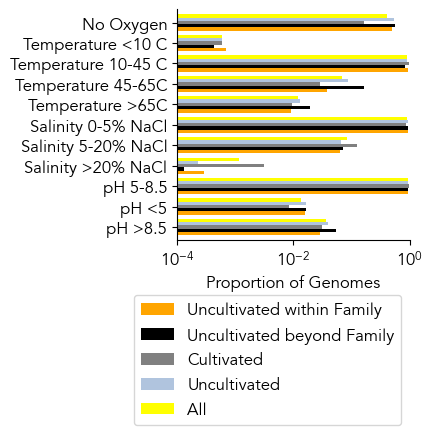

In [107]:

top_phyla = df['phylum'].value_counts().head(4).index
is_major = df['phylum'].isin(top_phyla)

is_anoxic = (df['oxygen'] <= 0.5)
indices = df[is_isolate & is_anoxic].index
median_cysteine = df_features.loc[indices, 'all_aa_C'].dropna().median()
genomes_above_median_cys =  df_features[df_features['all_aa_C'] > median_cysteine].index

data = {}
for data_df, label in zip(cultivation_datasets, cultivation_labels + cultivation_labels):
        
    is_anoxic = (data_df['oxygen'] <= 0.5)
    is_low_ph = (data_df['ph_optimum'] <= 5)
    is_high_ph = (data_df['ph_optimum'] >= 8.5)
    is_mod_ph = (data_df['ph_optimum'] > 5) & (data_df['ph_optimum'] < 8.5)
    is_low_temp = (data_df['temperature_optimum'] <= 10)
    is_mod_temp = (data_df['temperature_optimum'] >= 10) & (data_df['temperature_optimum'] < 45)
    is_high_temp = (data_df['temperature_optimum'] >= 45) & (data_df['temperature_optimum'] < 65)
    is_extreme_temp = (data_df['temperature_optimum'] >= 65)
    is_low_salinity = (data_df['salinity_optimum'] < 5)
    is_mod_salinity = (data_df['salinity_optimum'] >= 5) & (data_df['salinity_optimum'] < 20)
    is_high_salinity = (data_df['salinity_optimum'] >= 20)
    #is_above_median_cys = np.array([idx in genomes_above_median_cys for idx in data_df.index])
    #any_extreme = (is_low_ph | is_high_ph | is_low_temp | is_high_temp | is_mod_salinity | is_high_salinity)

    n_genomes = len(data_df)

    data[label] = {
        'No Oxygen' : len(data_df[is_anoxic]) / np.sum(~data_df['oxygen'].isnull()),
        #f"No Oxygen & Cys>{100*median_cysteine:.1f}%" : len(data_df[is_anoxic & is_above_median_cys]) / np.sum(~data_df['oxygen'].isnull() & is_anoxic),
        'Temperature <10 C' : len(data_df[is_low_temp])/ np.sum(~data_df['temperature_optimum'].isnull()),
        'Temperature 10-45 C' : len(data_df[is_mod_temp])/ np.sum(~data_df['temperature_optimum'].isnull()),
        'Temperature 45-65C' :  len(data_df[is_high_temp])/ np.sum(~data_df['temperature_optimum'].isnull()),
        'Temperature >65C' :  len(data_df[is_extreme_temp])/ np.sum(~data_df['temperature_optimum'].isnull()),
        'Salinity 0-5% NaCl' : len(data_df[is_low_salinity])/ np.sum(~data_df['salinity_optimum'].isnull()),
        'Salinity 5-20% NaCl' : len(data_df[is_mod_salinity])/ np.sum(~data_df['salinity_optimum'].isnull()),
        'Salinity >20% NaCl' :  len(data_df[is_high_salinity])/ np.sum(~data_df['salinity_optimum'].isnull()),
        'pH 5-8.5' :  len(data_df[is_mod_ph]) / np.sum(~data_df['ph_optimum'].isnull()),
        'pH <5' :  len(data_df[is_low_ph]) / np.sum(~data_df['ph_optimum'].isnull()),
        'pH >8.5' : len(data_df[is_high_ph])/ np.sum(~data_df['ph_optimum'].isnull()),

    }


fig, ax = plt.subplots(figsize=(3,3))
#pd.DataFrame(data)[::-1].T[::-1]
pd.DataFrame(data).T[::-1].T[::-1].plot.barh(ax=ax, 
                                           #color=['gray', 'cornflowerblue'],
                                           color=cultivation_colors[::-1], 
                                           width=0.8, edgecolor='None')
ax.set_xlim(1e-4,1)
ax.set_xscale('log')
ax.set_xlabel('Proportion of Genomes')
ax.legend(bbox_to_anchor=(1,-0.2))

In [108]:
# is_anoxic = (df['oxygen'] <= 0.5)
# indices = df[is_anoxic].index
# X = df_features.loc[indices, 'all_aa_C'].dropna()
# print(X.median())
# plt.hist(X, bins=50)

pH >8.5                1.274276
pH <5                  1.922198
pH 5-8.5               0.983123
Salinity >20% NaCl     0.071611
Salinity 5-20% NaCl    0.541927
Salinity 0-5% NaCl     1.067413
Temperature >65C       1.382562
Temperature 45-65C     3.047681
Temperature 10-45 C    0.934853
Temperature <10 C      0.994984
No Oxygen              3.229359
Name: Uncultivated / Cultivated, dtype: float64 0 Uncultivated

pH >8.5                0.932979
pH <5                  1.884539
pH 5-8.5               0.994390
Salinity >20% NaCl     0.092076
Salinity 5-20% NaCl    0.514752
Salinity 0-5% NaCl     1.071141
Temperature >65C       0.952122
Temperature 45-65C     1.300403
Temperature 10-45 C    0.991351
Temperature <10 C      1.173975
No Oxygen              3.075502
Name: Uncultivated within Family / Cultivated, dtype: float64 1 Uncultivated within Family

pH >8.5                1.782524
pH <5                  1.978277
pH 5-8.5               0.966345
Salinity >20% NaCl     0.041135
Salinity 5-2

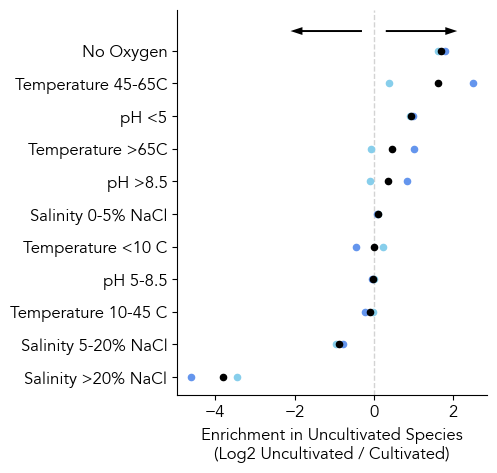

In [110]:
ratio_colors = ['black',  'skyblue', 'cornflowerblue']

fig, ax = plt.subplots(figsize=(4,5))
# 'Uncultivated beyond Family', 'Uncultivated within Family'
sers = []
for n, (numer, denom) in enumerate([('Uncultivated', 'Cultivated'),
                                    ('Uncultivated within Family', 'Cultivated'), 
                                    ('Uncultivated beyond Family', 'Cultivated')]):

    x = f"{numer} / {denom}"
    #fnumer = numer.replace(' ', '\n')
    label = numer.replace(' ', '\n')
    df_plot = pd.DataFrame(data)[::-1]
    df_plot[x] = df_plot[numer] / df_plot[denom]
    ser = df_plot[x]
    ser.name = x
    sers.append(ser)
    print(df_plot[x], n, numer)
    print()
    if n == 0:
        df_plot = df_plot.sort_values(x)
        indices = df_plot.index
    df_plot = df_plot.loc[indices]
    
    X = np.log2(df_plot[x])
    Y = range(len(X))
    
    ax.scatter(X,Y, color=ratio_colors[n], s=20, label=label, zorder=3-n)

ax.axvline(x=0, linestyle='--', color='lightgray', zorder=0)
ax.set_yticks(Y, df_plot[x].index)
#ax.set_xlim([-4,3])
ax.set_xlabel('Enrichment in Uncultivated Species\n(Log2 Uncultivated / Cultivated)')
#ax.legend(bbox_to_anchor=(0.5,-0.3), frameon=False, fontsize=11, loc='center')
#ax.legend(frameon=False, fontsize=11,bbox_to_anchor=(0.5,0.9),)
ax.arrow(-0.3, len(df_plot)-0.4, -1.5, 0, clip_on=False, width=0.06, head_width=0.24, head_length=0.3, lw=0, color='black')
ax.arrow(0.3, len(df_plot)-0.4, 1.5, 0, clip_on=False, width=0.06, head_width=0.24, head_length=0.3, lw=0, color='black')
plt.savefig("fig-3c.svg",  format="svg")
plt.show()

In [44]:
pd.DataFrame(data)

,All,Uncultivated (All),Cultivated,Uncultivated (Family+),Uncultivated (Genus-Species)
No Oxygen,0.413823,0.530648,0.164320,0.568296,0.505366
No Oxygen & Cys>1.4%,0.558787,0.567310,0.500000,0.372622,0.714327
Temperature <10 C,0.000589,0.000588,0.000591,0.000431,0.000694
Temperature 10-45 C,0.918544,0.898574,0.961193,0.817704,0.952880
Temperature 45-65C,0.069033,0.087859,0.028828,0.162869,0.037488
Temperature >65C,0.011834,0.012979,0.009388,0.018996,0.008938
Salinity 0-5% NaCl,0.914678,0.933479,0.874524,0.928624,0.936739
Salinity 5-20% NaCl,0.084167,0.066296,0.122334,0.071247,0.062972
Salinity >20% NaCl,0.001155,0.000225,0.003142,0.000129,0.000289
pH 5-8.5,0.949742,0.944571,0.960786,0.928451,0.955396


In [49]:
df_ratios = pd.concat(sers,axis=1)
(df_ratios['Uncultivated (Family+) / Cultivated'] / df_ratios['Uncultivated (Genus-Species) / Cultivated'])

pH >8.5                 1.910572
pH <5                   1.049740
pH 5-8.5                0.971797
Salinity >20% NaCl      0.446750
Salinity 5-20% NaCl     1.131411
Salinity 0-5% NaCl      0.991337
Temperature >65C        2.125315
Temperature 45-65C      4.344551
Temperature 10-45 C     0.858140
Temperature <10 C       0.620486
No Oxygen & Cys>1.4%    0.521641
No Oxygen               1.124525
dtype: float64

(0.0, 1.0)

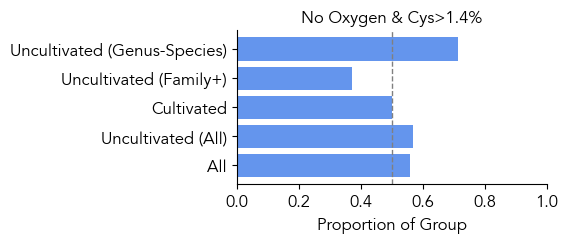

In [24]:
# 9.6% all
# 12% uncultivated
# 95% cultivated / 90% all
# 1
fig, ax = plt.subplots(figsize=(4,2))
ax.set_title('No Oxygen & Cys>1.4%')
pd.DataFrame(data).loc['No Oxygen & Cys>1.4%'].plot.barh(ax=ax, width=0.8, color='cornflowerblue')
ax.axvline(0.5, linestyle='--', color='gray')
ax.set_xlabel('Proportion of Group')
ax.set_xlim(0,1)

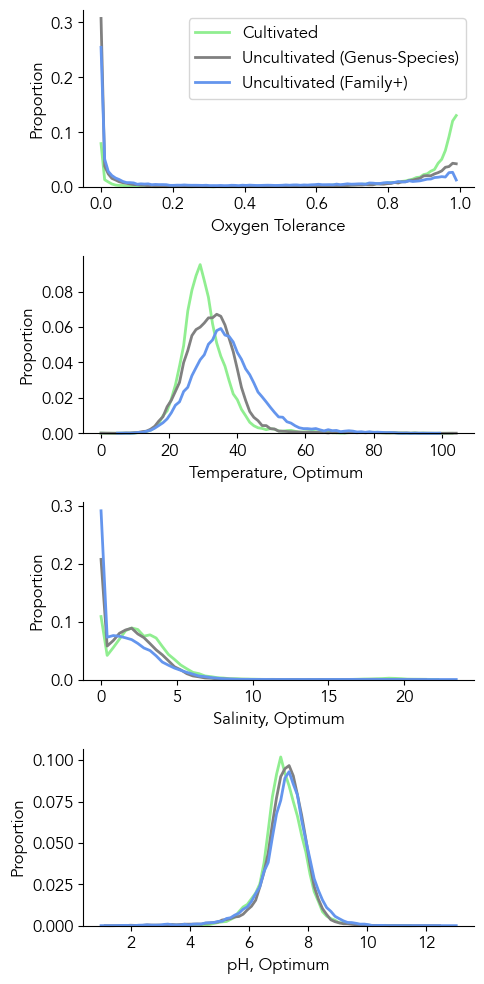

In [27]:
cultivation_labels = [ 'Cultivated',  'Uncultivated (Genus-Species)', 'Uncultivated (Family+)',]
cultivation_colors = ['lightgreen', 'gray', 'cornflowerblue', ]
cultivation_datasets = [df[is_isolate],  df[is_novel_genus], df[is_novel_family],]

def normalize_histogram(values, bins, norm = True):  
    digit_to_bin = dict(zip(range(1, len(bins)+1), list(bins) ))    
    binned_values = np.digitize(sorted(values), bins)
    counts = Counter(binned_values)
    if norm is True:
        counts = {k : v / len(binned_values) for k, v in counts.items()}
    
    binned_ser = pd.Series(counts).sort_index()
    X = binned_ser.index.map(digit_to_bin)
    Y = binned_ser.values
    return X, Y
    
fig, axes = plt.subplots(4,1,figsize=(5,10))
conditions = ['oxygen', 'temperature', 'salinity', 'ph']
for n, condition in enumerate(conditions):
    x = rename_condition_to_variable(condition)
    for m, (df_plot, color, label) in enumerate(zip(cultivation_datasets, cultivation_colors, cultivation_labels)):
        ax = axes[n]
        data = df_plot[~df_plot[x].isnull()]

        X = data[f"{x}"].values
        if x == 'oxygen':
            bin_min, bin_max = 0, 1
        if x == 'salinity_optimum':
            bin_min, bin_max, bin_step = 0,40,0.25
        if x == 'ph_optimum':
            bin_min, bin_max, bin_step = 0, 14, 0.25
        if x == 'temperature_optimum':
            bin_min, bin_max, bin_step = 0,120,3

        bins = np.linspace(bin_min, bin_max, 100)
        X, Y = normalize_histogram(X, bins, norm=True,)
        
        ax.plot(X, Y, color=color, label=label,  clip_on=False, lw=2)
        ax.set_xlabel(f"{plot_formats[x]}")
        ax.set_ylabel('Proportion')
        #ax.set_yscale('log')
        if n == 0:
            ax.legend()
            
for ax in axes:    
    ax.set_ylim([0, ax.get_ylim()[1]])

plt.tight_layout()

In [28]:
df[is_novel_family & (df['temperature_optimum'] > 45)][['phylum', 'class']].value_counts().head(20)

phylum                class               
p__Nanoarchaeota      c__Nanoarchaeia         510
p__Patescibacteria    c__Paceibacteria        295
p__Bacillota_A        c__Clostridia           234
p__Chloroflexota      c__Anaerolineae         191
                      c__Dehalococcoidia      145
p__Thermoplasmatota   c__Thermoplasmata       131
p__Omnitrophota       c__Koll11               129
p__Bacillota          c__Bacilli              126
p__Aenigmatarchaeota  c__Aenigmatarchaeia     119
p__Patescibacteria    c__ABY1                 111
                      c__Microgenomatia       108
p__Thermoproteota     c__Bathyarchaeia        102
p__Asgardarchaeota    c__Lokiarchaeia          62
p__Micrarchaeota      c__Micrarchaeia          59
p__Bacillota_G        c__Limnochordia          53
p__Bacillota_D        c__Dethiobacteria        47
p__Thermoplasmatota   c__E2                    43
p__Methylomirabilota  c__Methylomirabilia      41
p__Acidobacteriota    c__Aminicenantia         38
p__Ther

In [29]:
df[is_novel_genus & (df['temperature_optimum'] > 45)][['family', 'genus']].value_counts().head(50)

family                        genus                    
f__Methanobacteriaceae        g__Methanobrevibacter_A      27
f__Erysipelotrichaceae        g__UBA636                    27
f__Methanoculleaceae          g__Methanoculleus            24
f__Rikenellaceae              g__Alistipes                 18
f__Erysipelotrichaceae        g__Bulleidia                 16
f__GWC2-37-13                 g__GWC2-37-13                13
f__Methanomethylophilaceae    g__UBA71                     11
f__Methanobacteriaceae        g__Methanobacterium_A        11
f__Methanoregulaceae          g__UBA9949                    9
f__Aquificaceae               g__Hydrogenivirga             9
f__Methanosarcinaceae         g__Methanosarcina             9
f__Methanobacteriaceae        g__Methanobrevibacter         9
                              g__Methanobacterium           9
f__Bipolaricaulaceae          g__Bipolaricaulis             8
f__Erysipelotrichaceae        g__RUG521                     8
f__Thermococca

## Some specifics

In [131]:

df[df['genus'].str.contains("CAJXPB0")]
df[df['phylum'].str.contains("p__T1Sed10-126")] #.groupby('phylum')['salinity_optimum'] #.mean()
#df[df['family'].str.contains("f__PWEA01")].groupby('family')['salinity_optimum'].mean()


,oxygen,ph_max,ph_min,ph_optimum,salinity_max,salinity_min,salinity_optimum,temperature_max,temperature_min,temperature_optimum,...,domain,phylum,class,order,family,genus,species,ncbi_species,representative_ncbi_accession,ncbi_genus
GCA_003557545,0.542630,9.552554,6.851746,8.273123,14.343513,3.122748,7.208784,48.393488,21.449694,41.656365,...,d__Bacteria,p__T1Sed10-126,c__T1Sed10-126,o__T1Sed10-126,f__T1Sed10-126,g__PWOD01,s__PWOD01 sp003557545,,GCA_003557545,
GCA_003554945,0.476855,10.965133,7.271489,9.181141,17.697860,6.024488,10.696458,60.227462,31.992872,54.081295,...,d__Bacteria,p__T1Sed10-126,c__T1Sed10-126,o__T1Sed10-126,f__T1Sed10-126,g__T1Sed10-126,s__T1Sed10-126 sp003554945,,GCA_003554945,


# Supplement

## More Distributions

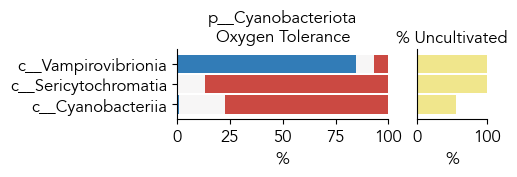

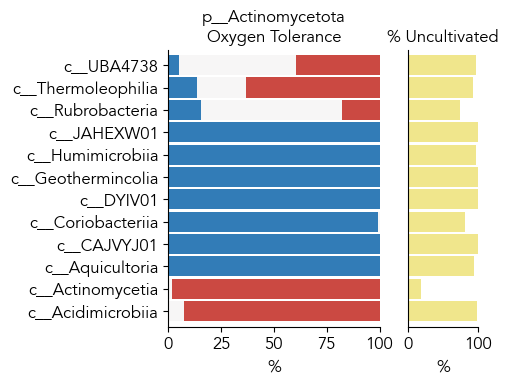

In [42]:
def plot_distribution_w_uncultivated(dist_df, rank):
    fig, axes = plt.subplots(1,2, figsize=(4,0.3*dist_df.shape[0]), gridspec_kw={'width_ratios' : (3,1)})

    ax = axes[0]
    bins = bin_definitions[target]
    if target in ['oxygen', 'ph_optimum']:
        #dist_df.columns = list(bins)
        #cmap = 'twilight'
        if target == 'oxygen':
            cmap = oxygen_cmap
        else:
            cmap = 'RdBu_r'
    else:
        dist_df.columns = list(bins)
        cmap = 'RdBu_r'
    
    dist_df.plot.barh(ax=ax, stacked=True, cmap=cmap, edgecolor='None', width=0.9, legend=False)
    ax.set_yticklabels(dist_df.index)
    ax.set_title(taxon+'\n'+plot_formats[target])
    ax.set_xlabel('%')
    
    ax = axes[1]
    isolate_df = df[df[rank].isin(dist_df.index)].copy()
    isolate_df['is_isolate'] = (isolate_df['ncbi_genome_category'] == 'none')
    isolate_df = isolate_df[[rank, 'is_isolate']].value_counts().to_frame().reset_index()
    isolate_df = pd.pivot(isolate_df, index=rank, columns='is_isolate').fillna(0).rename(columns={False : 'Uncultivated', True : 'Cultivated'})
    #isolate_df = isolate_df[rank, 'is_isolate'].value_counts() #[targets].mean().reset_index()
    isolate_df = 100 *  (1-(isolate_df.T / isolate_df.sum(axis=1)).T)
    isolate_df = isolate_df.T[::-1].T
    isolate_df.plot.barh(ax=ax, stacked=True, color=['khaki', 'white'], edgecolor='None', width=0.9, legend=False)
    ax.set_yticks([])
    ax.set_title('% Uncultivated')
    ax.set_ylabel('')
    for ax in axes:
        ax.set_xlabel('%')
        ax.set_xlim([0,100])
    return fig, axes
    
for taxon in ['p__Cyanobacteriota', 'p__Actinomycetota']: #, 'p__Asgardarchaeota',]:
    rank = 'class'
    target = 'oxygen'
    dist_df = distribution_df_by_target(target, df=df[df['phylum'] == taxon], taxonomic_level=rank, normalize=True)
    dist_df = 100 * dist_df

    plot_distribution_w_uncultivated(dist_df, rank)


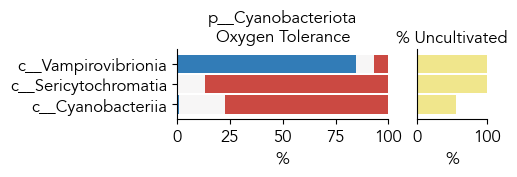

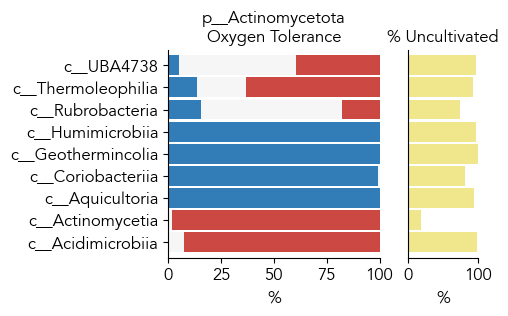

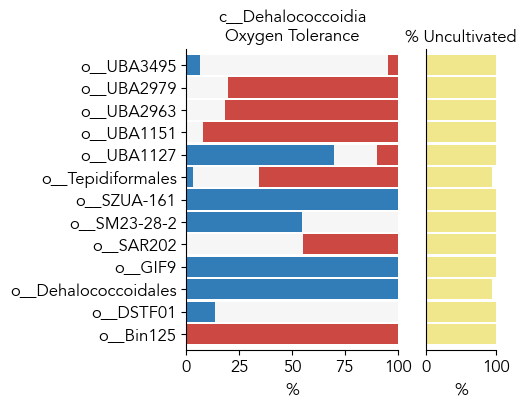

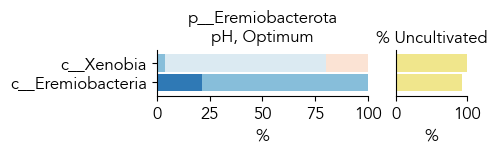

In [43]:
abbrev_to_level = {'p' : 'phylum', 'c' : 'class'}

rank = 'order'
for taxon, target, rank in [
    ('p__Cyanobacteriota', 'oxygen', 'class' ),
    ('p__Actinomycetota', 'oxygen', 'class'),
    ('c__Dehalococcoidia', 'oxygen', 'order'),
                      ('p__Eremiobacterota', 'ph_optimum', 'class'),
                     ]:

    level = abbrev_to_level[taxon.split('__')[0]]
    dist_df = distribution_df_by_target(target, df=df[df[level] == taxon], taxonomic_level=rank, normalize=False)
    dist_df = dist_df[dist_df.sum(axis=1) >= 10]
    dist_df = (dist_df.T / dist_df.sum(axis=1)).T
    dist_df = 100 * dist_df
    fig, axes = plot_distribution_w_uncultivated(dist_df, rank)

## Min > Max

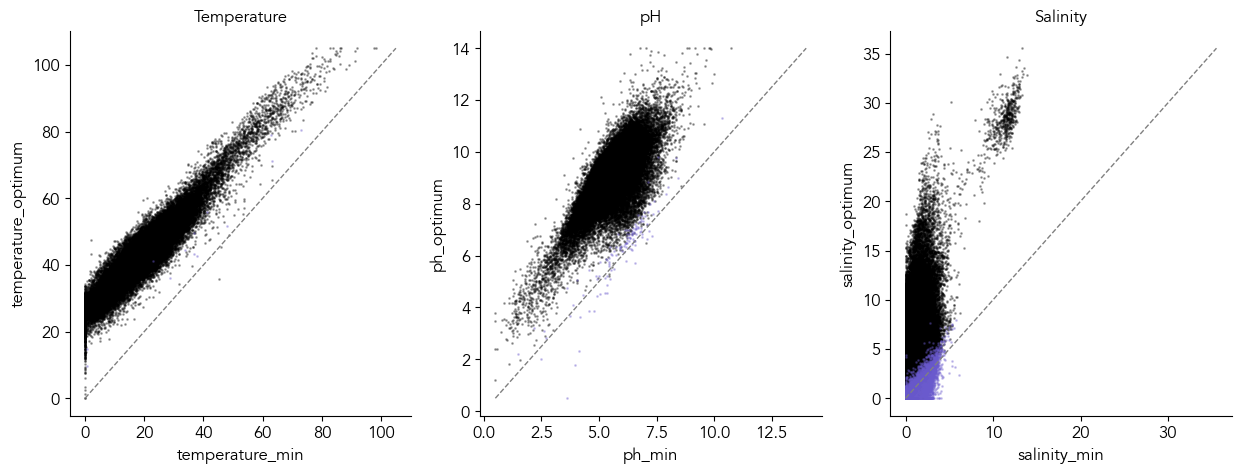

In [117]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

for n, target_type in enumerate(['temperature', 'ph', 'salinity']):
    ax = axes[n]
    x = f'{target_type}_min'
    y = f'{target_type}_max'
    z = f'{target_type}_optimum'

    filter = optima_df[z] > optima_df[y]
    X = optima_df[x].values
    Y = optima_df[y].values
    ax.scatter(X[~filter], Y[~filter], s=1, alpha=0.3)
    ax.scatter(X[filter], Y[filter], s=1, alpha=0.3)
    ax.plot([X.min(), Y.max()], [X.min(), Y.max()], linestyle='--', color='gray')
    ax.set_title(plot_formats[target_type])
    ax.set_xlabel(x)
    ax.set_ylabel(z)


In [118]:
target_type = 'salinity'
x = f'{target_type}_min'
y = f'{target_type}_max'
z = f'{target_type}_optimum'
print(len(optima_df[(optima_df[y] <= optima_df[x]) | (optima_df[y] <= optima_df[z]) ]) / len(optima_df[~optima_df[y].isnull()]))
#print(len(optima_df[optima_df[y] < optima_df[z]]) / len(optima_df[~optima_df[y].isnull()]))
df.loc[optima_df[optima_df[y] < optima_df[x]].index, ['class']].value_counts().head(50)

0.12319224921325271


class                    
c__Clostridia                2193
c__Bacilli                    597
c__Vampirovibrionia           288
c__Spirochaetia               124
c__Alphaproteobacteria        109
c__Nanoarchaeia                85
c__Polyangia                   78
c__Kiritimatiellia             78
c__Bacteroidia                 57
c__Campylobacteria             47
c__Lentisphaeria               39
c__UBA9042                     36
c__Paceibacteria               35
c__Planctomycetia              27
c__JAEDAM01                    23
c__Aenigmatarchaeia            19
c__Thermoplasmata              19
c__ABY1                        17
c__Gammaproteobacteria         15
c__Phycisphaerae               14
c__Lokiarchaeia                14
c__Bradymonadia                13
c__UBA1177                     13
c__Desulfovibrionia            12
c__Archaeoglobi                11
c__Coriobacteriia              10
c__Thermodesulfovibrionia      10
c__UBA3054                      9
c__Thermodesulfobacter

In [119]:
df[df['family'] == 'f__Pelagibacteraceae'][['salinity_optimum', 'salinity_max']].describe() 

,salinity_optimum,salinity_max
count,1136.000000,1136.000000
mean,0.056330,2.480899
std,0.226654,1.956910
min,0.000000,0.000000
25%,0.000000,0.722050
50%,0.000000,2.392170
75%,0.000000,3.811330
max,2.791584,10.657462


In [120]:
taxlevels = ['family', 'phylum']
ser_some = df.loc[optima_df[optima_df[y] <= optima_df[x]].index, taxlevels].value_counts()
ser_some.name = 'filtered'
ser_all = df.loc[:, taxlevels].value_counts()
ser_all.name = 'all'

counts_df = pd.concat([ser_some, ser_all], axis=1)
counts_df['f_filtered'] = counts_df['filtered'] / counts_df['all']
counts_df.loc[counts_df['all'] > 5].sort_values('f_filtered', ascending=False).head(30).style.background_gradient(cmap='Blues')

,,filtered,all,f_filtered
family,phylum,,,
f__Phormidiaceae_A,p__Cyanobacteriota,8.000000,8,1.000000
f__Thermocladiaceae,p__Thermoproteota,27.000000,27,1.000000
f__UASB340,p__Dependentiae,7.000000,7,1.000000
f__CG2-30-32-10,p__Bacteroidota,6.000000,6,1.000000
f__GWC2-42-12,p__Patescibacteria,8.000000,8,1.000000
f__PEYH01,p__Patescibacteria,8.000000,8,1.000000
f__CG03,p__CG03,6.000000,6,1.000000
f__CAG-312,p__Verrucomicrobiota,34.000000,35,0.971429
f__Parvarchaeaceae,p__Nanoarchaeota,33.000000,34,0.970588
